In [129]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from numpy.random import normal
import seaborn as sb
import scipy as sc

In [1]:
source_data_path = "./data/ElectionData.csv"

In [9]:
row_df = pd.read_csv(source_data_path)

In [10]:
# For this Lab we choose records with Party = PS and territoryName = Porto 
full_df = row_df[(row_df['Party'] == 'PS') & (row_df['territoryName'] == 'Porto')]
full_df

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
270,0,2019-10-06 20:10:02,Porto,0,40,243,21,223,1.93,230,...,55.08,22356,12314,PS,0,42.08,43.79,4861,20,17
656,5,2019-10-06 20:15:02,Porto,0,40,243,21,223,1.93,230,...,55.08,22356,12314,PS,0,42.08,43.79,4861,20,17
1042,10,2019-10-06 20:20:02,Porto,0,40,243,21,223,1.93,230,...,55.08,22356,12314,PS,0,42.08,43.79,4861,20,17
1428,15,2019-10-06 20:25:02,Porto,0,40,243,21,223,1.93,230,...,55.08,22356,12314,PS,0,42.08,43.79,4861,20,17
1814,20,2019-10-06 20:30:02,Porto,0,40,243,21,223,1.93,230,...,55.08,22356,12314,PS,0,42.08,43.79,4861,20,17
2200,25,2019-10-06 20:35:02,Porto,0,40,243,21,223,1.93,230,...,55.08,22356,12314,PS,0,42.08,43.79,4861,20,17
2586,30,2019-10-06 20:40:02,Porto,0,40,243,21,223,1.93,230,...,55.08,22356,12314,PS,0,42.08,43.79,4861,20,17
2989,35,2019-10-06 20:45:02,Porto,0,40,243,21,223,1.93,230,...,55.08,22356,12314,PS,0,42.08,43.79,4861,20,17
3392,40,2019-10-06 20:50:01,Porto,2,38,243,103,2604,2.13,2352,...,58.60,216232,126717,PS,1,40.16,41.86,49022,18,17
3795,45,2019-10-06 20:55:01,Porto,2,38,243,113,2994,2.13,2706,...,58.90,246868,145413,PS,1,40.38,42.09,56648,18,17


## Step 1. Choose subsample with main variables for your further analysis. 

###  For this lab you need subsample with 3-5 random variables, at least half of them should be described with continuous random variable type

numParishesApproved (numeric): Number of parishes approved in this location   
votersPercentage (numeric): Percentage of voters   
blankVotesPercentage (numeric): Percentage of blank votes   
validVotesPercentage (numeric): Percentage of valid votes in a party   

In [21]:
df = full_df[['numParishesApproved', 'votersPercentage', 'blankVotesPercentage', 'validVotesPercentage' ]]
df

,numParishesApproved,votersPercentage,blankVotesPercentage,validVotesPercentage
270,21,54.31,1.93,43.79
656,21,54.31,1.93,43.79
1042,21,54.31,1.93,43.79
1428,21,54.31,1.93,43.79
1814,21,54.31,1.93,43.79
2200,21,54.31,1.93,43.79
2586,21,54.31,1.93,43.79
2989,21,54.31,1.93,43.79
3392,103,57.54,2.13,41.86
3795,113,57.82,2.13,42.09


## Step 2. You need to make a non-parametric estimation of PDF in form of histogram and using kernel density function (or probability law in case of discrete RV).

(for each variable)

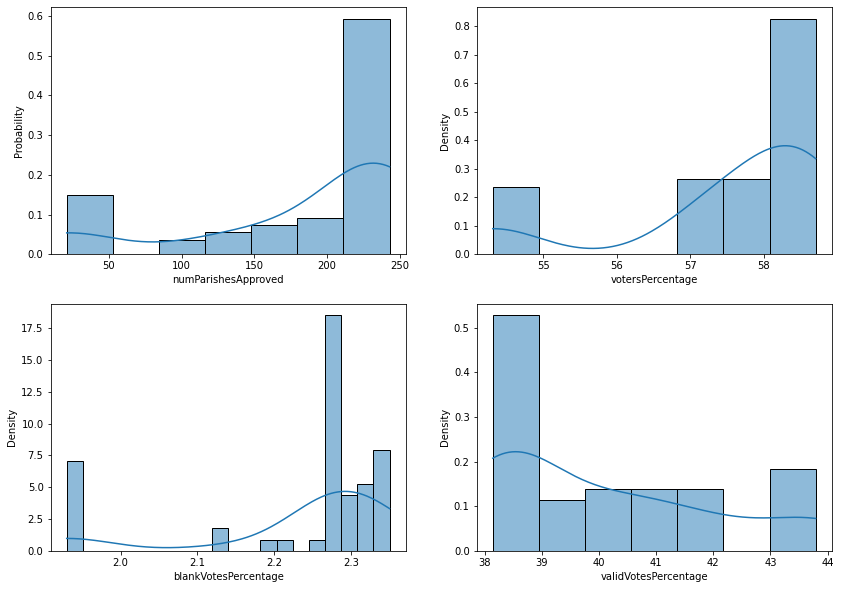

In [34]:
# initialize figure canvas
fig, ax = pyplot.subplots(2, 2, figsize=(14,10))
sb.histplot(df['numParishesApproved'], ax=ax[0,0], kde=True, stat="probability")
sb.histplot(df['votersPercentage'], ax=ax[0,1], kde=True, stat="density")
sb.histplot(df['blankVotesPercentage'], ax=ax[1,0], kde=True, stat="density")
sb.histplot(df['validVotesPercentage'], ax=ax[1,1], kde=True, stat="density")

pyplot.show()

## Step 3. You need to make an estimation of order statistics and represent them as “box with whiskers” plot.
we will find quintiles estimations


In [57]:
def quantilies(c):
    return [
        np.quantile(c, 0.1),
        np.quantile(c, 0.25), 
        np.quantile(c, 0.5), 
        np.quantile(c, 0.75),
        np.quantile(c, 0.9)
    ]

numParishesApproved = df['numParishesApproved'].to_numpy()
numParishesApproved_quantiles = quantilies(numParishesApproved)

votersPercentage = df['votersPercentage'].to_numpy()
votersPercentage_quantiles = quantilies(votersPercentage)

blankVotesPercentage = df['blankVotesPercentage'].to_numpy()
blankVotesPercentage_quantiles = quantilies(blankVotesPercentage)

validVotesPercentage = df['validVotesPercentage'].to_numpy()
validVotesPercentage_quantiles = quantilies(validVotesPercentage)

print('numParishesApproved: ', numParishesApproved_quantiles)
print('votersPercentage: ', votersPercentage_quantiles)
print('blankVotesPercentage: ', blankVotesPercentage_quantiles)
print('validVotesPercentage: ', validVotesPercentage_quantiles)

numParishesApproved:  [21.0, 155.0, 226.5, 241.75, 243.0]
votersPercentage:  [54.31, 57.2175, 58.144999999999996, 58.59, 58.59]
blankVotesPercentage:  [1.93, 2.27, 2.28, 2.31, 2.34]
validVotesPercentage:  [38.14, 38.285000000000004, 39.235, 41.63, 43.79]


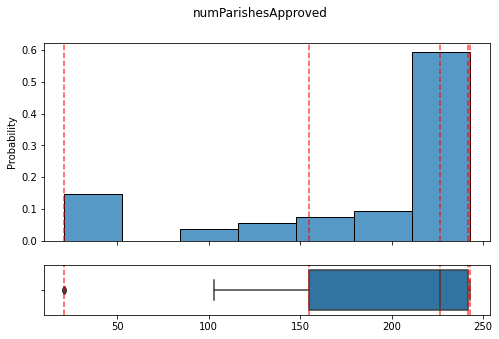

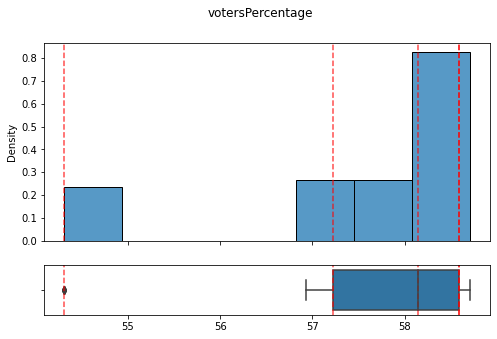

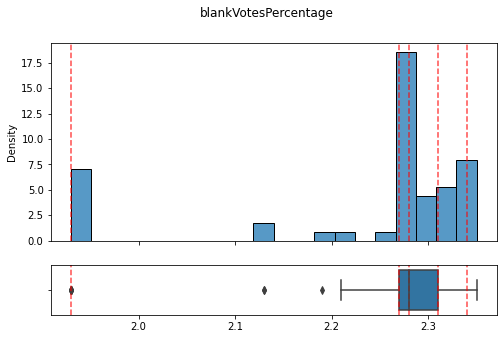

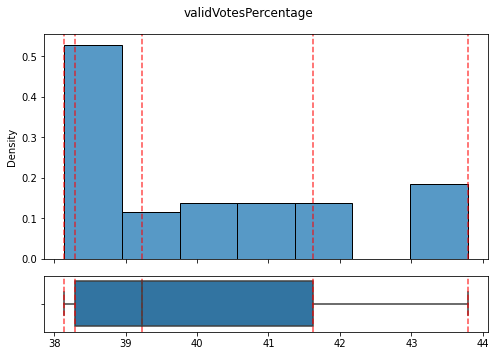

In [113]:
def drow(title, method, data, quantiles, width = 7):
    fig, ax = pyplot.subplots(2,1, figsize=(width, 5), sharex=True, gridspec_kw={'height_ratios': [2,0.5]})
    fig.suptitle(title)
    
    sb.histplot(data, ax=ax[0], kde = False, stat=method)
    for q in quantiles:
        ax[0].axvline(q, color='r', linestyle='--', alpha=0.7)

    sb.boxplot(x=data, ax=ax[1])
    for q in quantiles:
        ax[1].axvline(q, color='r', linestyle='--', alpha=0.7)

drow('numParishesApproved', 'probability', numParishesApproved, numParishesApproved_quantiles, 8)
drow('votersPercentage', 'density', votersPercentage, votersPercentage_quantiles, 8)
drow('blankVotesPercentage', 'density', blankVotesPercentage, blankVotesPercentage_quantiles, 8)
drow('validVotesPercentage', 'density', validVotesPercentage, validVotesPercentage_quantiles)

pyplot.tight_layout()
pyplot.show()

## Step 4. Find one or several theoretical distributions that could describe your sample on a basis of non-parametric analysis results.

In [255]:
get_best_distribution(df['votersPercentage'])

p value for norm = 0.015073743218093405
p value for exponweib = 2.987881478275312e-14
p value for weibull_max = 0.0354912106797709
p value for weibull_min = 2.2447847135950216e-21
p value for pareto = 8.481486906672672e-09
p value for genextreme = 0.014098731415651211
p value for pearson3 = 0.17167947009124862
Best fitting distribution: pearson3
Best p value: 0.17167947009124862
Parameters for the best fit: (-2.602921172199903, 57.79339044288198, 1.1929312114316382)


('pearson3',
 0.17167947009124862,
 (-2.602921172199903, 57.79339044288198, 1.1929312114316382))

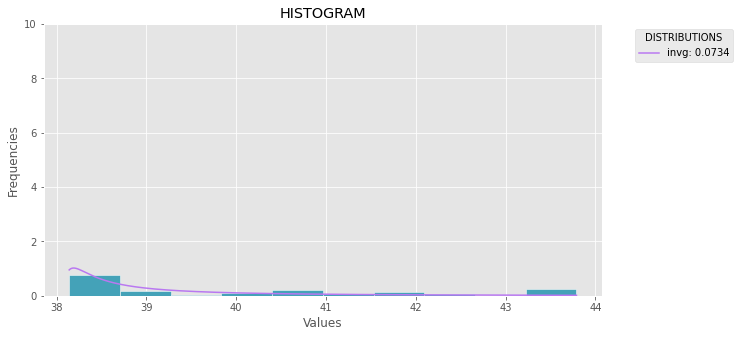

In [285]:
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import random

mpl.style.use("ggplot")

def danoes_formula(data):
    """
    DANOE'S FORMULA
    https://en.wikipedia.org/wiki/Histogram#Doane's_formula
    """
    N = len(data)
    skewness = st.skew(data)
    sigma_g1 = math.sqrt((6*(N-2))/((N+1)*(N+3)))
    num_bins = 1 + math.log(N,2) + math.log(1+abs(skewness)/sigma_g1,2)
    num_bins = round(num_bins)
    return num_bins

def plot_histogram(data, results, n):
    ## n first distribution of the ranking
    N_DISTRIBUTIONS = {k: results[k] for k in list(results)[:n]}

    ## Histogram of data
#     plt.axis((2,50,25,250))
    plt.figure(figsize=(10, 5))
    plt.hist(data, density=True, ec='white', color=(63/235, 149/235, 170/235))
    plt.title('HISTOGRAM')
    plt.xlabel('Values')
    plt.ylabel('Frequencies')

    ## Plot n distributions
    for distribution, result in N_DISTRIBUTIONS.items():
        # print(i, distribution)
        sse = result[0]
        arg = result[1]
        loc = result[2]
        scale = result[3]
        x_plot = np.linspace(min(data), max(data), 1000)
        y_plot = distribution.pdf(x_plot, loc=loc, scale=scale, *arg)
        plt.plot(x_plot, y_plot, label=str(distribution)[32:-34] + ": " + str(sse)[0:6], color=(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)))
    
    plt.ylim(top=10) #ymax is your value
    plt.legend(title='DISTRIBUTIONS', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

def fit_data(data):
    ## st.frechet_r,st.frechet_l: are disbled in current SciPy version
    ## st.levy_stable: a lot of time of estimation parameters
    ALL_DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm, st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]
    
    MY_DISTRIBUTIONS = [st.invgauss]

    ## Calculae Histogram
    num_bins = danoes_formula(data)
    frequencies, bin_edges = np.histogram(data, num_bins, density=True)
    central_values = [(bin_edges[i] + bin_edges[i+1])/2 for i in range(len(bin_edges)-1)]

    results = {}
    for distribution in MY_DISTRIBUTIONS:
        ## Get parameters of distribution
        params = distribution.fit(data)
        
        ## Separate parts of parameters
        arg = params[:-2]
        loc = params[-2]
        scale = params[-1]
    
        ## Calculate fitted PDF and error with fit in distribution
        pdf_values = [distribution.pdf(c, loc=loc, scale=scale, *arg) for c in central_values]
        
        ## Calculate SSE (sum of squared estimate of errors)
        sse = np.sum(np.power(frequencies - pdf_values, 2.0))
        
        ## Build results and sort by sse
        results[distribution] = [sse, arg, loc, scale]
        
    results = {k: results[k] for k in sorted(results, key=results.get)}
    return results
        
    ## Import data
data = df['validVotesPercentage']
results = fit_data(data)

plot_histogram(data, results, 5)
# Надо отрисовать каждое из распределений

#votersPercentage - pearson3 
#blankVotesPercentage - cauchy
#validVotesPercentage - invgauss


# Open - Лаплас
# High - 

## Step 5. Estimate parameters of chosen distributions using methods of maximum likelihood and least squares method.

In [290]:
from scipy.stats import pearson3, cauchy, invgauss

votersPercentage_MLE = pearson3.fit(df['votersPercentage'], method='MLE')
votersPercentage_MM = pearson3.fit(df['votersPercentage'], method='MM')

blankVotesPercentage_MLE = cauchy.fit(df['blankVotesPercentage'], method='MLE')
blankVotesPercentage_MM = cauchy.fit(df['blankVotesPercentage'], method='MM')

# low_MLE = chi.fit(stock.Low, method='MLE')
# low_MM = chi.fit(stock.Low, method='MM')

# close_MLE = chi2.fit(stock.Close, method='MLE')
# close_MM = chi2.fit(stock.Close, method='MM')

print('votersPercentage')
print(f'MLE: {votersPercentage_MLE}\nMM: {votersPercentage_MM}', end='\n\n')

print('blankVotesPercentage')
print(f'MLE: {blankVotesPercentage_MLE}\nMM: {blankVotesPercentage_MM}', end='\n\n')

# print('Low')
# print(f'MLE: {low_MLE}\nMM: {low_MM}', end='\n\n')

# print('Close')
# print(f'MLE: {close_MLE}\nMM: {close_MM}')

ValueError: Method of moments encountered a non-finite distribution moment and cannot continue. Consider trying method='MLE'.